La Min Oo
6540039
Assignment 6


1.1:Plotting Training and Testing Data

In [30]:
# ===============================================================
import numpy as np
import matplotlib.pyplot as plt
# Data Initialization
X = np.array([-4.5, -3.5, -3, -1.8, -0.2, 0.3, 1.3, 2.6, 3.8, 4.8]).reshape(-1,1)
y = np.array([
    [-0.91650116],
    [-0.47546053],
    [-0.10972425],
    [0.29504095],
    [-0.01596218],
    [0.10014949],
    [0.48104303],
    [0.10979023],
    [-0.99742128],
    [-0.91221826]
]).reshape(-1,1)
X_test = np.array([-3.99, -1.38, -1.37, -0.94,
  0.69,  1.4,   1.57,  1.78,  1.81,  4.89]).reshape(-1,1)
y_test = np.array([
    [-0.80737607],
    [0.19813376],
    [0.19537639],
[0.07185977],
[0.24954213],
[0.50662504],
[0.52943298],
[0.52406997],
[0.51999057],
[-0.82318288]
]).reshape(-1,1)
#===============================================================

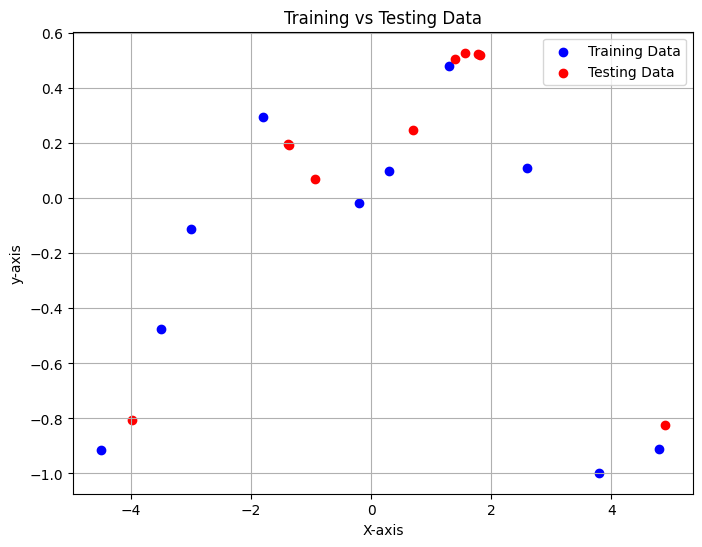

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.title('Training vs Testing Data')
plt.legend()
plt.grid(True)
plt.show()

1.2:  Polynomial Feature Transformation

In [32]:
def poly_features(X, K):
    """
    Transforms input data X into polynomial features of degree K.
    """
    n_samples = X.shape[0]
    X_poly = np.zeros((n_samples, K + 1))
    for i in range(K + 1):
        X_poly[:, i] = X.flatten() ** i
    return X_poly

# Example usage (degree 5):
K = 5
X_poly = poly_features(X, K)
X_test_poly = poly_features(X_test, K)


The purpose of the polynomial feature transformation is to expand the input data into a higher-dimensional feature space.
This transformation has the effect to capture the non-linear relationships between the input features and the target variable.

1.3: Fitting the Model Using Maximum Likelihood

Theta (MLE): [[ 0.24879002]
 [ 0.16821157]
 [-0.04601541]
 [-0.03263259]
 [-0.00076967]
 [ 0.00119427]]


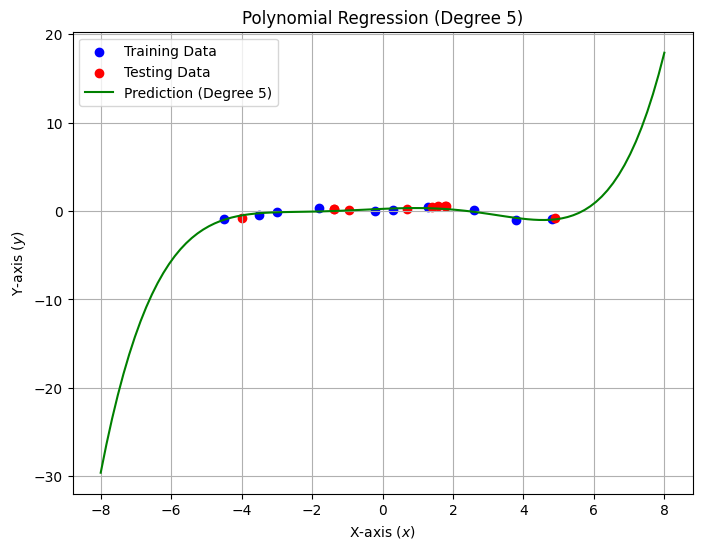

In [33]:
def max_lik_estimate(Phi, y):
    """
    Computes the Maximum Likelihood Estimate for theta.
    """
    return np.linalg.inv(Phi.T @ Phi) @ (Phi.T @ y)

# Transform data to polynomial features of degree 5
K = 5
Phi = poly_features(X, K)
Phi_test = poly_features(X_test, K)

# Calculate theta using MLE
theta_mle = max_lik_estimate(Phi, y)
print("Theta (MLE):", theta_mle)

# Generate predictions for x in range [-8, 8]
x_range = np.linspace(-8, 8, 100).reshape(-1, 1)
x_range_poly = poly_features(x_range, K)
y_pred = x_range_poly @ theta_mle

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(x_range, y_pred, color='green', label='Prediction (Degree 5)')
plt.xlabel("X-axis ($x$)")
plt.ylabel("Y-axis ($y$)")
plt.title("Polynomial Regression (Degree 5)")
plt.legend()
plt.grid(True)
plt.show()


1.4: Model Evaluation

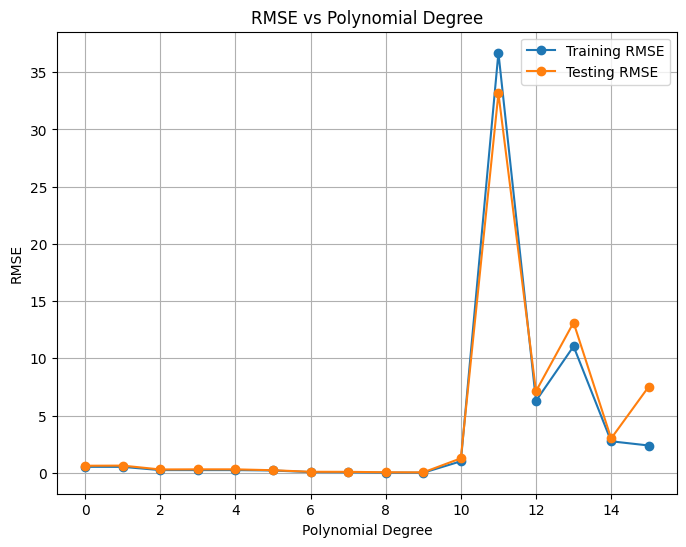

In [34]:
def rmse(y_true, y_pred):
    """
    Computes the Root Mean Square Error (RMSE).
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Evaluate RMSE for degrees 0 to 15
degrees = range(16)
rmse_train = []
rmse_test = []

for K in degrees:
    # Transform data
    Phi = poly_features(X, K)
    Phi_test = poly_features(X_test, K)

    # Fit model
    theta_mle = max_lik_estimate(Phi, y)

    # Predictions
    y_train_pred = Phi @ theta_mle
    y_test_pred = Phi_test @ theta_mle

    # Compute RMSE
    rmse_train.append(rmse(y, y_train_pred))
    rmse_test.append(rmse(y_test, y_test_pred))

# Plot RMSE
plt.figure(figsize=(8, 6))
plt.plot(degrees, rmse_train, label='Training RMSE', marker='o')
plt.plot(degrees, rmse_test, label='Testing RMSE', marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("RMSE vs Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()


1.5: Selecting the Best Model

Optimal Polynomial Degree is : 9


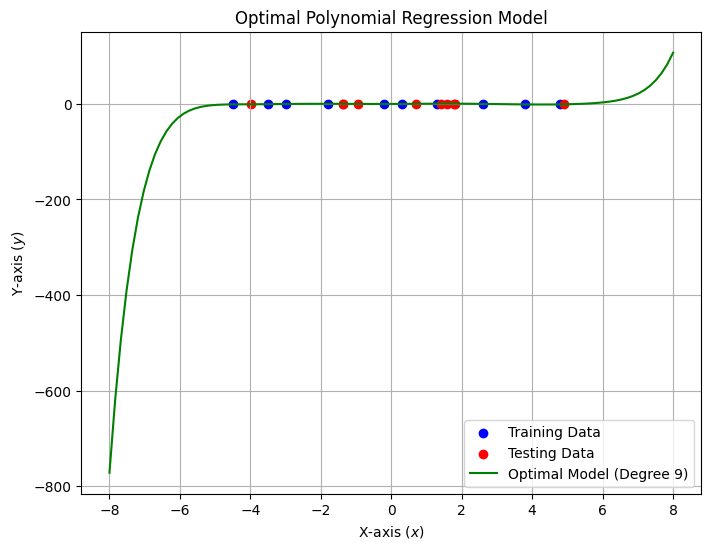

In [35]:
# Find the optimal degree (lowest test RMSE)
optimal_degree = np.argmin(rmse_test)
print("Optimal Polynomial Degree is :", optimal_degree)

# Fit and plot the best model
Phi_optimal = poly_features(X, optimal_degree)
Phi_test_optimal = poly_features(X_test, optimal_degree)
theta_optimal = max_lik_estimate(Phi_optimal, y)

y_pred_optimal = poly_features(x_range, optimal_degree) @ theta_optimal

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(x_range, y_pred_optimal, color='green', label=f'Optimal Model (Degree {optimal_degree})')
plt.xlabel("X-axis ($x$)")
plt.ylabel("Y-axis ($y$)")
plt.title("Optimal Polynomial Regression Model")
plt.legend()
plt.grid(True)
plt.show()


2.1: Mathematical Derivation
The gradient of the sum-of-squares loss function is derived as:










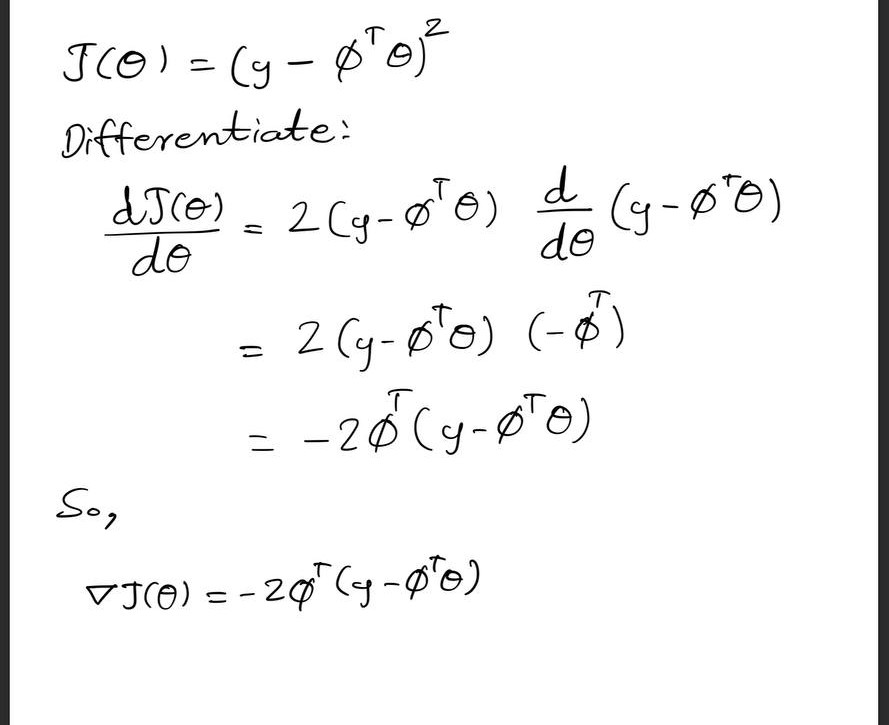

2.2: Feature Transformation and Gradient Descent Implementation

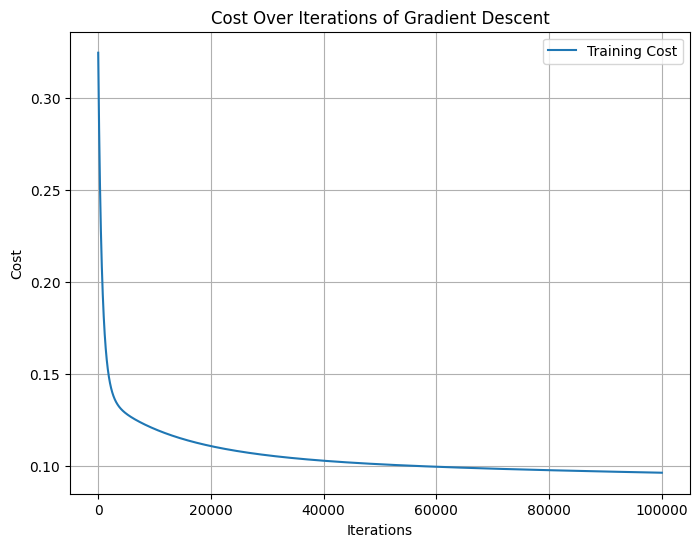

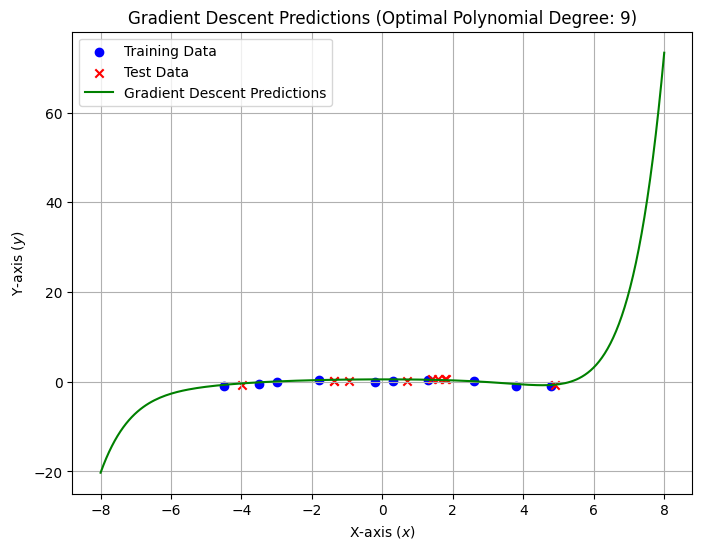

In [ ]:

# Normalize Features
def normalize_features(Phi):
    """
    Normalize features to have zero mean and unit variance.
    Handles cases where standard deviation is zero.
    """
    mu = np.mean(Phi, axis=0)
    sigma = np.std(Phi, axis=0)

    # Handle zero standard deviations
    sigma[sigma == 0] = 1  # Avoid division by zero

    Phi_normalized = (Phi - mu) / sigma
    return Phi_normalized, mu, sigma

# Gradient Descent Implementation
def gradient_descent(Phi, y, learning_rate=0.0002, iterations=100000):
    """
    Implements Gradient Descent for polynomial regression.
    Args:
        Phi: Feature matrix (N x D)
        y: Target values (N x 1)
        learning_rate: Learning rate for gradient descent
        iterations: Number of iterations
    Returns:
        theta: Optimized parameters (D x 1)
        cost_history: List of cost values during training
    """
    np.random.seed(42)
    m, n = Phi.shape  # Get the size of the input matrix
    theta = np.zeros((n, 1))  # Initialize theta to zeros

    cost_history = []  # Store cost for plotting

    for i in range(iterations):
        # Compute predictions
        predictions = Phi @ theta

        # Calculate error
        error = predictions - y

        # Compute gradient
        gradient = (1 / m) * (Phi.T @ error)

        # Update theta
        theta = theta - learning_rate * gradient

        # Calculate cost (Mean Squared Error)
        cost = np.mean(error**2)
        cost_history.append(cost)

    return theta, cost_history

# Normalize training and test features
Phi_train_norm, mu_train, sigma_train = normalize_features(Phi_optimal)
Phi_test_norm = (Phi_test_optimal - mu_train) / sigma_train  # Use training mu and sigma for test data

# Run Gradient Descent
theta_gd, cost_history = gradient_descent(Phi_train_norm, y)

# Visualization of Training Cost
plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_history)), cost_history, label="Training Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Over Iterations of Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

# Generate Data for Prediction Visualization
x_plot = np.linspace(-8, 8, 200).reshape(-1, 1)  # Range for prediction visualization
Phi_plot = poly_features(x_plot, optimal_degree)
Phi_plot_norm = (Phi_plot - mu_train) / sigma_train  # Normalize using training mu and sigma
y_plot = Phi_plot_norm @ theta_gd

# Plot Training Data, Test Data, and Predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Training Data', marker='o')
plt.scatter(X_test, y_test, color='red', label='Test Data', marker='x')
plt.plot(x_plot, y_plot, color='green', label='Gradient Descent Predictions', linestyle='-')
plt.xlabel('X-axis ($x$)')
plt.ylabel('Y-axis ($y$)')
plt.title(f'Gradient Descent Predictions (Optimal Polynomial Degree: {optimal_degree})')
plt.legend()
plt.grid(True)
plt.show()


Dynamic adjustments to the learning rate are important for improving how quickly and effectively a model learns during training. One way to do this is through learning rate schedules, like step decay or exponential decay. These methods start with a larger learning rate to make big updates early on, which helps the model learn quickly, and then gradually reduce the learning rate to make smaller, more careful updates as training continues.

2.3: Model Evaluation and Comparison

RMSE (Gradient Descent): 0.2554
RMSE (MLE): 0.0307


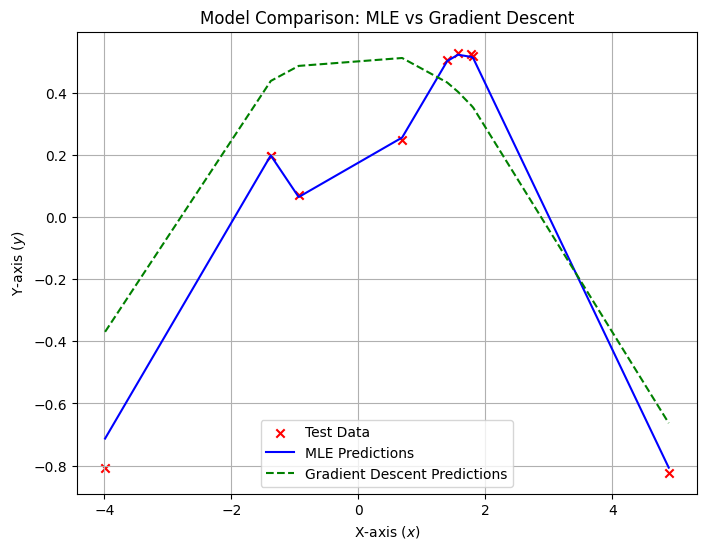

In [37]:

def rmse(y_true, y_pred):
    """
    Computes the Root Mean Squared Error (RMSE).
    Args:
        y_true: True target values (N x 1)
        y_pred: Predicted target values (N x 1)
    Returns:
        RMSE value
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Predictions using Gradient Descent
y_pred_gd = Phi_test_norm @ theta_gd  # Predictions on the test set using gradient descent

# Maximum Likelihood Estimation (MLE) Implementation
def max_lik_estimate(Phi, y):
    """
    Computes the Maximum Likelihood Estimation (MLE) for linear regression.
    Args:
        Phi: Feature matrix (N x D)
        y: Target values (N x 1)
    Returns:
        theta_mle: Parameters estimated using MLE
    """
    return np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y

# Calculate MLE Parameters
theta_mle = max_lik_estimate(Phi_optimal, y)

# Predictions using MLE
y_pred_mle = Phi_test_optimal @ theta_mle

# Compute RMSE for both methods
rmse_gd = rmse(y_test, y_pred_gd)
rmse_mle = rmse(y_test, y_pred_mle)

# Print RMSE Results
print(f"RMSE (Gradient Descent): {rmse_gd:.4f}")
print(f"RMSE (MLE): {rmse_mle:.4f}")

# Visualization: Compare Predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='red', label='Test Data', marker='x')
plt.plot(X_test, y_pred_mle, color='blue', label='MLE Predictions', linestyle='-')
plt.plot(X_test, y_pred_gd, color='green', label='Gradient Descent Predictions', linestyle='--')
plt.xlabel('X-axis ($x$)')
plt.ylabel('Y-axis ($y$)')
plt.title('Model Comparison: MLE vs Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()



Implementation and Convergence Behavior
Implementing dynamic learning rates involves defining update rules that modify the learning rate based on the chosen strategy. This approach typically results in faster initial convergence and improved stability as the algorithm approaches the minimum.

Effectiveness Compared to Maximum Likelihood Estimation (MLE)
When comparing gradient descent with dynamic learning rates to MLE, gradient descent can offer greater flexibility and speed in training complex models. However, MLE often results in lower RMSE values, indicating better fits for simpler models under certain conditions.Ultimately, while MLE may yield better performance metrics in some cases, gradient descent's adaptability makes it suitable for a wider range of applications.